Homework 2 Report
==================================================
Note that the professor verbally mentioned that it was recommended to include both the explanations of the answers to the homework as well as the source code and plots needed for the homework in one single report. Therefore, the content in this report contains the answers and explanations for the homework as well as the underlying source code needed to provide these answers.


- The GitHub link to the Assignment Repository is :
- https://github.com/tmasse11/ECGR_5101

- The GitHub link to the Jupyter Notebook is : 
- https://github.com/tmasse11/ECGR_5101/blob/main/TerrillMassey_800670388_Homework3.ipynb


Author: Terrill Earl Massey
Student ID: 800670388


The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 1 of the homework. 
===========================================================================================================================
The task is to build a logistic regression binary classifier for positive diabetes. An 80%, 20% split between training and evalutation(test) will applied to the input dataset. The data used will be derived from the diabetes.csv 

To achieve this task,  we shall first read in and format the input explanatory values and output values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

diabetes_data = pd.DataFrame(pd.read_csv(r"/home/terrill/ECGR_5102/Assignment3/diabetes.csv"))
M = len(diabetes_data)
print("Number of Samples(M): ", M)
diabetes_data.head()

Number of Samples(M):  768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The next step is to perform a 80%, 20% split of the dataset into a training and evaluation set. 

In [2]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X = diabetes_data.iloc[:, :-1].values
Y = diabetes_data.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, train_size=0.8, random_state=42)

M_training = len(X_train)
M_test = len(X_test)

print("Training Dataset Shape: ", X_train.shape)
print("Validation/Test Dataset Shape: ", X_test.shape)


Training Dataset Shape:  (614, 8)
Validation/Test Dataset Shape:  (154, 8)


The next step is to standardize the training and test datasets so that we will have correct feature scaling. Note that since the Y_test and Y_train data are binary outcomes, no feature scaling is requried.

In [3]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler() # Apply Standardization to the input training and test datasets. 
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

print("X_Train Data Samples :")
print(X_train[0:5, :])


X_Train Data Samples :
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]


The next step is to apply a logistic regression model to the training dataset. The LogisticRegression module from the sklearn.linear_model library is used.

In [4]:
from sklearn.linear_model import LogisticRegression

logistic_regressor_classifier = LogisticRegression(random_state=0, max_iter=1000) # Logistic Regression Estimater instatiation. The default is 100 iterations to take before convergence. 
logistic_regressor_classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

The next step is to predict output values based on the input validation set ("X_test") with the Logistic Regression Estimater.

In [5]:
Y_predictions = logistic_regressor_classifier.predict(X_test) # Construct predictions with the trained logistic regression binary classifier through using the validation input dataset.
print("Excerpt of Predicted Outcomes from Logistic Regressor")
print("===============================================")
print(Y_predictions[0:20])

Excerpt of Predicted Outcomes from Logistic Regressor
[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1]


<b>Answer to Question 1. </b> The following sections are considered the answer to question 1.


Results of Logistic Regression Binary Classifier




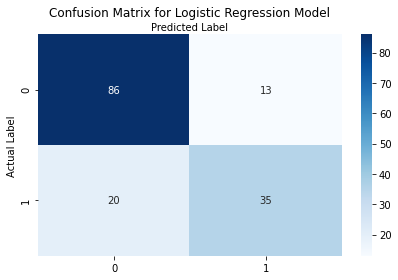


Accuracy of Classifier: 0.7857
Precision of Classifier: 0.7292
Recall of Classifier: 0.6364


In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_logistic_regressor_results():
    fig, ax = plt.subplots(1,1) 
    print("")
    print("Results of Logistic Regression Binary Classifier")
    print("=====================================================")
    print("")
    print("")
    # plot the confusion matrix of the binary classifier model for the output label("Outcome") in the dataset.
    conf_matrix = confusion_matrix(Y_test, Y_predictions) # Construct confusion matrix dataset.
    possible_classes = [0, 1] # Name of Potential Classes as defined by the output label "Outcome". Since this is a binary classifier, the possible classes are just 0 and 1.
    tick_marks = np.arange(len(possible_classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(possible_classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(possible_classes)
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='g', cmap="Blues", ax=ax)
    ax.xaxis.set_label_position("top")
    ax.title.set_text("Confusion Matrix for Logistic Regression Model")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    plt.tight_layout()
    plt.show()

    # Display the Performance Results of the Binary Classifier.

    print("")
    print("Accuracy of Classifier: {:.4f}".format(metrics.accuracy_score(Y_test, Y_predictions)))
    print("Precision of Classifier: {:.4f}".format(metrics.precision_score(Y_test, Y_predictions)))
    print("Recall of Classifier: {:.4f}".format(metrics.recall_score(Y_test, Y_predictions)))


plot_logistic_regressor_results()
print("=====================================================")

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 2 of the homework. 
===========================================================================================================================
The task is to build a Naive Bayes binary classifier for positive diabetes. An 80%, 20% split between training and evalutation(test) will applied to the input dataset. The datasets X_train, Y_train, Y_test, and Y_train declared in Problem 1 can be re-used in the Naive Bayes binary classifier. These training sets have already been split with a 80%  and 20% split respectively. These trainnig and test/valdiation sets have also been feature scaled(through standardization) already.

The first step is to define a Naive Bayes classifier and model it based on the X_train data and its labels, Y_train. Note that since the input data is not discrete, a gaussian naive bayes classifier must be used.

In [7]:
from sklearn.naive_bayes import GaussianNB
gaussian_naive_bayes_classifier = GaussianNB()
gaussian_naive_bayes_classifier.fit(X_train, Y_train) # Use the training datasets to model a gaussian naive bayes classifier.

GaussianNB()

The next step is the use the modeled gaussian naive bayes classifier to make predictions based on the validation set(X_test)


In [8]:
Y_predictions_naivebayes = gaussian_naive_bayes_classifier.predict(X_test)
print("Excerpt of Predicted Outcomes from Logistic Regressor")
print("===============================================")
print(Y_predictions_naivebayes[0:20])

Excerpt of Predicted Outcomes from Logistic Regressor
[0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0]


<b>Answer to Question 2. </b> The following sections are considered the answer to question 2.


Results of Gaussian Naive Bayes Binary Classifier




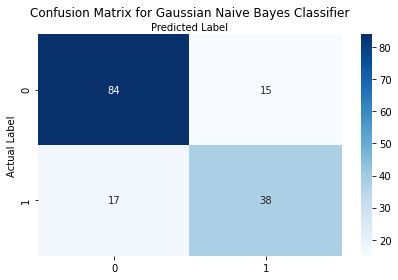


Accuracy of Classifier: 0.7922
Precision of Classifier: 0.7170
Recall of Classifier: 0.6909


Results of Logistic Regression Binary Classifier




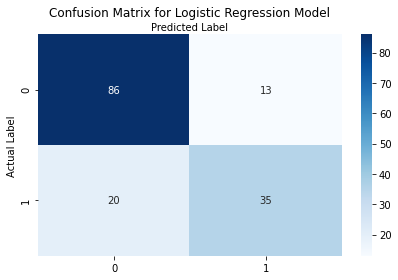


Accuracy of Classifier: 0.7857
Precision of Classifier: 0.7292
Recall of Classifier: 0.6364


In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_naive_bayes_results():
    fig, ax = plt.subplots(1,1) 
    print("")
    print("Results of Gaussian Naive Bayes Binary Classifier")
    print("=====================================================")
    print("")
    print("")
    # plot the confusion matrix of the binary classifier model for the output label("Outcome") in the dataset.
    conf_matrix = confusion_matrix(Y_test, Y_predictions_naivebayes) # Construct confusion matrix dataset.
    possible_classes = [0, 1] # Name of Potential Classes as defined by the output label "Outcome". Since this is a binary classifier, the possible classes are just 0 and 1.
    tick_marks = np.arange(len(possible_classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(possible_classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(possible_classes)
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='g', cmap="Blues", ax=ax)
    ax.xaxis.set_label_position("top")
    ax.title.set_text("Confusion Matrix for Gaussian Naive Bayes Classifier")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    plt.tight_layout()
    plt.show()

    # Display the Performance Results of the Binary Classifier.

    print("")
    print("Accuracy of Classifier: {:.4f}".format(metrics.accuracy_score(Y_test, Y_predictions_naivebayes)))
    print("Precision of Classifier: {:.4f}".format(metrics.precision_score(Y_test, Y_predictions_naivebayes)))
    print("Recall of Classifier: {:.4f}".format(metrics.recall_score(Y_test, Y_predictions_naivebayes)))
  
plot_naive_bayes_results() # Plot Naive Bayes binary classifier results for comparison. 
print("")
plot_logistic_regressor_results() # Plot logistic regression binary classifier results for comparison. 

The performance results of the Gaussian Navie Bayes Binary Classifier is shown in the first figure in the immediate section (section 21) above. The performance results of the Logistic Regression Binary Classifier are shown in the second figure in the immediate section (section 21) above. 

Looking at the results of these two binary classifiers, it can be observed that the accuracy of the Logistic Regression binary classifier is slightly less than the accuracy of the Naive Bayes binary classifier. It is speculated that the logisitic regression classifier has slightly less accuracy than the Naive Bayes classifier because the training dataset has a  small sample size and high dimensionality. Typically, the Naive Bayes classifier(or any generative models) performs better than discriminative models(such as the logistic regression classifier) with high dimensional datasets with small sample numbers because generative models consider all features of the input data, whereas discriminative models does not neccessarily consider all features. Also, because of the relatively small sample size(compared to the dimensionality) of the input dataset, the logistic regression classifier may have experienced slight overfitting of the training data, thus reducing accuracy performance during valdiation with the test dataset. It is speculated that if there were more samples in the input dataset, the accuracy of the logistic regression classifier may exceed the accuracy of the Naive Bayes model. 

Also, it is observed from the results that the recall of the Naive Bayes classifier is also higher than the recall of the Logistic Regression classifier. This means that the Naive Bayes classifier can more effectively detect a positive outcome(a positive diabetes case) than the logistic regression classifier. It is believed that the underlying reason for this is the same as the underlying reason for the accuracy observation mentioned in the paragraph above(the naive bayes classifier has a higher recall because the input dataset has a relatively small sample size and a high dimensionality). As mentioned in the paragraph above, generative models (such as the naive bayes classifier) typically perform better than discriminative models(such as the logistic regression classifier) with input datasets with small sample sizes and high dimensionality because generative models consider all features of the data whereas discriminative models does not necessarily consider all features of the data. It is also speculated that if there were more samples within the dataset, the recall of the logistic regression classifer may exceed the recall of the naive bayes model as well. 

Also, based on the results in the code block immediately above, the precision of the Naive Bayes classifier was smaller than the precision of the Logistic Regression classifier. This is expected because in practice, as the recall is increased, the precision typically decreases for a classifier. Also if recall is decereased, the precision typically increases for a classifier. 

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 3 of the homework. 
===========================================================================================================================
The task is to build a Logistic Regression binary classifier for positive diabetes. K-fold cross valdidation is used for training and validation of the binary classifier. There will be two seperate trainings with one training having a K value of 5, and another training having a K value of 10. 

The first step is to define a logistic regression binary classifier that can be trained using K-fold cross validation with a specified K value.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics

def logistic_regressor_with_k_fold(k_value):
    standard_scaler = StandardScaler() # Apply Standardization to the input training and test datasets. 
    X = diabetes_data.iloc[:, :-1].values
    Y = diabetes_data.iloc[:, -1].values
    X = standard_scaler.fit_transform(X) # Apply Standardization to input datasets
   
    logistic_regressor_classifier = LogisticRegression(random_state=0, max_iter=1000) # The default is 100 iterations to take before convergence. 
    k_fold = KFold(n_splits=k_value, random_state=None) # K-Fold Object with a K value of 5.
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    for train_index, test_index in k_fold.split(X): # Loop that performs cross validation training across all folds. 
        x_train = X[train_index, :]  # Construct training dataset for current fold. 
        x_test  = X[test_index, :] # Construct valdiation dataset for current fold. 
        y_train = Y[train_index]  # Construct training labels for current fold. 
        y_test  = Y[test_index] # Construct validation labels for current fold. 
        
        
        logistic_regressor_classifier.fit(x_train, y_train) # Train the logistic regressor model to the current training fold. 
        predicted_values = logistic_regressor_classifier.predict(x_test) # Peform evalution on the current evalutation fold.
        accuracy_scores.append(metrics.accuracy_score(y_test, predicted_values))  # Append the accuracy score for the current evaluation.
        precision_scores.append(metrics.precision_score(y_test, predicted_values)) # Append the precision score for the current evaluation.
        recall_scores.append(metrics.recall_score(y_test, predicted_values))  # Append the recall score for the current evaluation.

    return np.asarray(accuracy_scores), np.asarray(precision_scores), np.asarray(recall_scores)

    


The next step is to use the created function to perform a K-fold cross validation with a K value of 5, and then another K-fold cross validation with a K value of 10.

In [11]:
accuracy_scores_k_of_5, precision_scores_k_of_5, recall_scores_k_of_5 = logistic_regressor_with_k_fold(k_value=5)
accuracy_scores_k_of_10, precision_scores_k_of_10, recall_scores_k_of_10 = logistic_regressor_with_k_fold(k_value=10)

<b>Answer to Question 3. </b> The following sections are considered the answer to question 3. The average accuracy, recall and precision of the K-fold cross validations were used to access the performance of the Logistic Regression Classifiers.

In [12]:

print("")
print("Results of Logistic Regression Binary Classifier with K-Fold Cross Validation, K=5")
print("========================================================================================")
print("")


# Display the Performance Results of the Binary Classifier.
print("Accuracy of Classifier for all K-folds: ", accuracy_scores_k_of_5)
print("Precision Scores of Classifier for all K-folds: ", precision_scores_k_of_5)
print("Recall values of Classifier for all K-folds: ", recall_scores_k_of_5)
print("")
print("Average Accuracy of Classifier: {:.4f}".format(np.average(accuracy_scores_k_of_5)))
print("Variance of Accuracy across K-folds:{:.4f}".format(np.var(accuracy_scores_k_of_5)))
print("")
print("Average Precision of Classifier: {:.4f}".format(np.average(precision_scores_k_of_5)))
print("Variance of Precision across K-folds: {:.4f}".format(np.var(precision_scores_k_of_5)))
print("")
print("Average Recall of Classifier: {:.4f}".format(np.average(recall_scores_k_of_5)))
print("Variance of Recall across K-folds: {:.4f}".format(np.var(recall_scores_k_of_5)))
print("")


print("")
print("Results of Logistic Regression Binary Classifier with K-Fold Cross Validation, K=10")
print("========================================================================================")
print("")


# Display the Performance Results of the Binary Classifier.
print("Accuracy of Classifier for all K-folds: ", accuracy_scores_k_of_10)
print("Precision Scores of Classifier for all K-folds: ", precision_scores_k_of_10)
print("Recall values of Classifier for all K-folds: ", recall_scores_k_of_10)
print("")
print("Average Accuracy of Classifier: {:.4f}".format(np.average(accuracy_scores_k_of_10)))
print("Variance of Accuracy across K-folds:{:.4f}".format(np.var(accuracy_scores_k_of_10)))
print("")
print("Average Precision of Classifier: {:.4f}".format(np.average(precision_scores_k_of_10)))
print("Variance of Precision across K-folds: {:.4f}".format(np.var(precision_scores_k_of_10)))
print("")
print("Average Recall of Classifier: {:.4f}".format(np.average(recall_scores_k_of_10)))
print("Variance of Recall across K-folds: {:.4f}".format(np.var(recall_scores_k_of_10)))
print("")



Results of Logistic Regression Binary Classifier with K-Fold Cross Validation, K=5

Accuracy of Classifier for all K-folds:  [0.77272727 0.72727273 0.75974026 0.83006536 0.77124183]
Precision Scores of Classifier for all K-folds:  [0.71111111 0.72       0.73809524 0.67567568 0.74358974]
Recall values of Classifier for all K-folds:  [0.59259259 0.5625     0.54385965 0.64102564 0.53703704]

Average Accuracy of Classifier: 0.7722
Variance of Accuracy across K-folds:0.0011

Average Precision of Classifier: 0.7177
Variance of Precision across K-folds: 0.0006

Average Recall of Classifier: 0.5754
Variance of Recall across K-folds: 0.0014


Results of Logistic Regression Binary Classifier with K-Fold Cross Validation, K=10

Accuracy of Classifier for all K-folds:  [0.68831169 0.83116883 0.76623377 0.7012987  0.77922078 0.79220779
 0.84415584 0.83116883 0.76315789 0.80263158]
Precision Scores of Classifier for all K-folds:  [0.64285714 0.76470588 0.80769231 0.64       0.75       0.85
 0.5625 

As illustrated in the code section immediately above(section 24), average recall, accuracy and precision were calculated for the K-fold cross validation training with a K value of 5 and 10. 

It was shown that the average accuracy and recall of the logistic regression classifer was higher with a K value of 10  than with a K value of 5 used during the K-fold cross validation training. This means that the logistic regression classifier that was trained with a K value of 10 was able to more effectively detect the condition(a positive outcome case for diabetes) when compared to the logistic regression classifier that was trained with a K value of 5. It is speculated that this phenomenon occured because increasing the K value within K-fold cross validation typically leads to a less biased logistic regression model which may reduce  the possibility of overfitting during training. K-fold cross validation is typically used to reduce or avoid overfitting within a model. If overfitting is avoided, the accuracy and recall of the model may improve during testing/validation.

The accuracy and recall of the Logistic Regression classifier in Question 1 (explained in results section of Question 1 in section 6) are slightly higher than the accuracy and recall of the logistic regression classifiers with K-fold cross validation. Looking at this comparison, it is now speculated that the K-fold cross validation approaches may have introduced large variances within the training data causing slight overfitting. Due to possible slight overfitting, the logistic regression models with K-fold cross validation may have decreased performance(recall and accuracy) in respect to the original logistic regression model defined in Problem 1.

It was also noticed that the precision of the logistic regression classifier  using a K-Fold cross-validation with K=10 had higher precision value than the logistic regression classifier in Problem 1. Typically for classifiers, as the precision is increased, an decrease in recall may be observed. However this is not always the case, as illustrated with the precision value of the logistic regression classifier using K-fold cross validation with a K-value of 5. This precision value is actually slightly less than the precision of the logistic regression classifier in problem 1. However since these two values are close, the slight difference may be attributed to statistical noise. 

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 4 of the homework. 
===========================================================================================================================
The task is to build a Naive Bayes binary classifier for positive diabetes. K-fold cross valdidation is used for training and validation of the binary classifier. There will be two seperate trainings with one training having a K value of 5, and another training having a K value of 10. 

The first step is to define a naive bayes binary classifier that can be trained using K-fold cross validation with a specified K value.

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics

def naive_bayes_regressor_with_k_fold(k_value):
    standard_scaler = StandardScaler() # Apply Standardization to the input training and test datasets. 
    X = diabetes_data.iloc[:, :-1].values
    Y = diabetes_data.iloc[:, -1].values
    X = standard_scaler.fit_transform(X) # Apply Standardization to input data.
    
    gaussian_naive_bayes_classifier = GaussianNB() # Define Gaussian Naive Bayes Classifier Estimator
    
    k_fold = KFold(n_splits=k_value, random_state=None) # K-Fold Object with a K value of 5.
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    for train_index, test_index in k_fold.split(X): # Loop that performs cross validation training across all folds. 
        x_train = X[train_index, :]  # Construct training dataset for current fold. 
        x_test  = X[test_index, :] # Construct valdiation dataset for current fold. 
        y_train = Y[train_index]  # Construct training labels for current fold. 
        y_test  = Y[test_index] # Construct validation labels for current fold. 
        
        
        gaussian_naive_bayes_classifier.fit(x_train, y_train) # Use the training datasets to model a gaussian naive bayes classifier. 
        predicted_values = gaussian_naive_bayes_classifier.predict(x_test) # Peform evalution on the current evalutation fold.
        accuracy_scores.append(metrics.accuracy_score(y_test.ravel(), predicted_values))  # Append the accuracy score for the current evaluation.
        precision_scores.append(metrics.precision_score(y_test.ravel(), predicted_values)) # Append the precision score for the current evaluation.
        recall_scores.append(metrics.recall_score(y_test.ravel(), predicted_values))  # Append the recall score for the current evaluation.

    return np.asarray(accuracy_scores), np.asarray(precision_scores), np.asarray(recall_scores)


The next step is to use the created function to perform a K-fold cross validation with a K value of 5, and then another K-fold cross validation with a K value of 10.

In [14]:
bayes_accuracy_scores_k_of_5, bayes_precision_scores_k_of_5, bayes_recall_scores_k_of_5 = naive_bayes_regressor_with_k_fold(k_value=5)
bayes_accuracy_scores_k_of_10, bayes_precision_scores_k_of_10, bayes_recall_scores_k_of_10 = naive_bayes_regressor_with_k_fold(k_value=10)

<b>Answer to Question 4. </b> The following sections are considered the answer to question 4.

In [15]:
print("")
print("Results of Gaussian Naive Bayes Binary Classifier with K-Fold Cross Validation, K=5")
print("========================================================================================")
print("")


# Display the Performance Results of the Binary Classifier.
print("Accuracy of Classifier for all K-folds: ", bayes_accuracy_scores_k_of_5)
print("Precision Scores of Classifier for all K-folds: ", bayes_precision_scores_k_of_5)
print("Recall values of Classifier for all K-folds: ", bayes_recall_scores_k_of_5)
print("")
print("Average Accuracy of Classifier: {:.4f}".format(np.average(bayes_accuracy_scores_k_of_5)))
print("Variance of Accuracy across K-folds:{:.4f}".format(np.var(bayes_accuracy_scores_k_of_5)))
print("")
print("Average Precision of Classifier: {:.4f}".format(np.average(bayes_precision_scores_k_of_5)))
print("Variance of Precision across K-folds: {:.4f}".format(np.var(bayes_precision_scores_k_of_5)))
print("")
print("Average Recall of Classifier: {:.4f}".format(np.average(bayes_recall_scores_k_of_5)))
print("Variance of Recall across K-folds: {:.4f}".format(np.var(bayes_recall_scores_k_of_5)))
print("")


print("")
print("Results of Gaussian Naive Bayes Binary Classifier with K-Fold Cross Validation, K=10")
print("========================================================================================")
print("")


# Display the Performance Results of the Binary Classifier.
print("Accuracy of Classifier for all K-folds: ", bayes_accuracy_scores_k_of_10)
print("Precision Scores of Classifier for all K-folds: ", bayes_precision_scores_k_of_10)
print("Recall values of Classifier for all K-folds: ", bayes_recall_scores_k_of_10)
print("")
print("Average Accuracy of Classifier: {:.4f}".format(np.average(bayes_accuracy_scores_k_of_10)))
print("Variance of Accuracy across K-folds:{:.4f}".format(np.var(bayes_accuracy_scores_k_of_10)))
print("")
print("Average Precision of Classifier: {:.4f}".format(np.average(bayes_precision_scores_k_of_10)))
print("Variance of Precision across K-folds: {:.4f}".format(np.var(bayes_precision_scores_k_of_10)))
print("")
print("Average Recall of Classifier: {:.4f}".format(np.average(bayes_recall_scores_k_of_10)))
print("Variance of Recall across K-folds: {:.4f}".format(np.var(bayes_recall_scores_k_of_10)))
print("")



Results of Gaussian Naive Bayes Binary Classifier with K-Fold Cross Validation, K=5

Accuracy of Classifier for all K-folds:  [0.75324675 0.71428571 0.74675325 0.80392157 0.74509804]
Precision Scores of Classifier for all K-folds:  [0.66666667 0.69230769 0.6875     0.59574468 0.66666667]
Recall values of Classifier for all K-folds:  [0.59259259 0.5625     0.57894737 0.71794872 0.55555556]

Average Accuracy of Classifier: 0.7527
Variance of Accuracy across K-folds:0.0008

Average Precision of Classifier: 0.6618
Variance of Precision across K-folds: 0.0012

Average Recall of Classifier: 0.6015
Variance of Recall across K-folds: 0.0036


Results of Gaussian Naive Bayes Binary Classifier with K-Fold Cross Validation, K=10

Accuracy of Classifier for all K-folds:  [0.67532468 0.80519481 0.75324675 0.71428571 0.72727273 0.76623377
 0.80519481 0.81818182 0.73684211 0.75      ]
Precision Scores of Classifier for all K-folds:  [0.61290323 0.68421053 0.8        0.65384615 0.61538462 0.77272727


The immediate code section above showcases the average accuracy, recall, and precision of the Naive Bayes classifier that has used K-fold cross validation with a K value of 5 and a K value of 10. However, it does not make sense to use K-fold cross validation on a generative model(such as a Naive Bayes classifier) because unlike discriminative models, generative models use class-conditional probability density functions of the input dataset  to directly make a prediction. Therefore, generative models do not use a cost function or gradient descent to "train" over iterations and achieve a fitted model for prediction, generative models make predictions directly from the underlying class-conditional probabilities derived from the input data currently presented to the model.

Because the K-fold cross validation is designed to train a model over K-folds, a generative model will make a prediction based only on the data in the current K-fold, as it cannot learn anything from the previous K-fold. Essentially, the K-fold cross validation technique applied in this case is the equivalent to constructing multiple naive bayes classifiers with each classifier modeled to a certain K-fold. 